# Importing Repositories

In [273]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import holidays
from scipy import stats
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize']=(20,10)

In [274]:
def missing_zero_values_table(df):
        ''''Takes a pandas dataframe and returns a statistics table that explains the missing and 
        zero values'''
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Our selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
    
        return mz_table

# Importing data files

## Paths for files

In [275]:
path_price = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadPrices_12.1.D'
path_totalload = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadTotalLoadForecast'
path_windsolar = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadGenerationForecastForWindAndSolar_14.1.D'

## Price Timeseries Importing

In [276]:

df_price = pd.read_csv(r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\Data Frames\price_timeseries_outliers.csv', 
parse_dates=['DateTime'])


In [277]:
df_price = df_price[['DateTime', 'Year', 'Month','Week', 'Day', 'Hour', 'Price']]
df_price

,DateTime,Year,Month,Week,Day,Hour,Price
0,2015-01-01 00:00:00,2015,1,1,3,0,0.00
1,2015-01-01 01:00:00,2015,1,1,3,1,0.00
2,2015-01-01 02:00:00,2015,1,1,3,2,0.00
3,2015-01-01 03:00:00,2015,1,1,3,3,0.00
4,2015-01-01 04:00:00,2015,1,1,3,4,0.00
...,...,...,...,...,...,...,...
52529,2020-12-31 18:00:00,2020,12,53,3,18,71.30
52530,2020-12-31 19:00:00,2020,12,53,3,19,61.04
52531,2020-12-31 20:00:00,2020,12,53,3,20,60.39
52532,2020-12-31 21:00:00,2020,12,53,3,21,57.96


## Wind and Solar Timeseries Importing

In [278]:
f_windsolar = glob.glob(path_windsolar + "/*.csv")
dwindsolar = [pd.read_csv(f, sep='\t', parse_dates=['DateTime']) for f in f_windsolar]

df_windsolar = pd.concat(dwindsolar)
df_windsolar = df_windsolar[df_windsolar['AreaCode'] == '10YGB----------A']
df_windsolar = df_windsolar[['DateTime', 'ProductionType', 'AggregatedGenerationForecast']]
df_windsolar.sort_values(by='DateTime', ascending=True)
df_windsolar.reset_index(drop=True, inplace=True)

In [279]:
df_windsolar

,DateTime,ProductionType,AggregatedGenerationForecast
0,2014-12-30 00:00:00,Solar,0.00
1,2014-12-30 01:00:00,Solar,0.00
2,2014-12-30 02:00:00,Solar,0.00
3,2014-12-30 03:00:00,Solar,0.00
4,2014-12-30 04:00:00,Solar,0.00
...,...,...,...
509107,2021-06-14 19:00:00,Wind Offshore,1563.23
509108,2021-06-14 20:00:00,Wind Offshore,1590.47
509109,2021-06-14 21:00:00,Wind Offshore,1574.14
509110,2021-06-14 22:00:00,Wind Offshore,1450.72


### Splitting the WindSolar Dataset into 3 Datasets per Solar, Wind Offshore, Wind Onshore

In [280]:
df_windsolar['ProductionType'].unique()

array(['Solar', 'Wind Offshore', 'Wind Onshore'], dtype=object)

In [281]:
df_solar = df_windsolar[df_windsolar['ProductionType'] == 'Solar']
df_solar.sort_values(by='DateTime', ascending=True)
df_solar.reset_index(drop=True, inplace=True)
df_solar.rename(columns={'AggregatedGenerationForecast':'SolarGeneration'}, inplace=True)
df_solar = df_solar[['DateTime','SolarGeneration']]
df_solar

,DateTime,SolarGeneration
0,2014-12-30 00:00:00,0.0
1,2014-12-30 01:00:00,0.0
2,2014-12-30 02:00:00,0.0
3,2014-12-30 03:00:00,0.0
4,2014-12-30 04:00:00,0.0
...,...,...
169699,2021-06-14 19:00:00,227.0
169700,2021-06-14 20:00:00,11.5
169701,2021-06-14 21:00:00,0.0
169702,2021-06-14 22:00:00,0.0


In [282]:
df_wind_off = df_windsolar[df_windsolar['ProductionType'] == 'Wind Offshore']
df_wind_off.sort_values(by='DateTime', ascending=True)
df_wind_off.reset_index(drop=True, inplace=True)
df_wind_off.rename(columns={'AggregatedGenerationForecast':'WindOffGeneration'}, inplace=True)
df_wind_off = df_wind_off[['DateTime', 'WindOffGeneration']]
df_wind_off

,DateTime,WindOffGeneration
0,2014-12-30 00:00:00,996.58
1,2014-12-30 01:00:00,1059.20
2,2014-12-30 02:00:00,1123.27
3,2014-12-30 03:00:00,1177.54
4,2014-12-30 04:00:00,1188.21
...,...,...
169699,2021-06-14 19:00:00,1563.23
169700,2021-06-14 20:00:00,1590.47
169701,2021-06-14 21:00:00,1574.14
169702,2021-06-14 22:00:00,1450.72


In [283]:
df_wind_on = df_windsolar[df_windsolar['ProductionType'] == 'Wind Onshore']
df_wind_on.sort_values(by='DateTime', ascending=True)
df_wind_on.reset_index(drop=True, inplace=True)
df_wind_on.rename(columns={'AggregatedGenerationForecast':'WindOnGeneration'}, inplace=True)
df_wind_on = df_wind_on[['DateTime','WindOnGeneration']]
df_wind_on

,DateTime,WindOnGeneration
0,2014-12-30 00:00:00,2363.80
1,2014-12-30 01:00:00,2413.88
2,2014-12-30 02:00:00,2450.75
3,2014-12-30 03:00:00,2500.78
4,2014-12-30 04:00:00,2536.07
...,...,...
169699,2021-06-14 19:00:00,4896.71
169700,2021-06-14 20:00:00,3928.19
169701,2021-06-14 21:00:00,3277.03
169702,2021-06-14 22:00:00,2880.91


# Merging Datasets

In [284]:
# Merging Price, Solar Generation, Wind offshore and Wind onshore generation datasets to one

df_merged = pd.merge(df_price, df_solar, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_off, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_on, how='left', on='DateTime')
df_merged.drop_duplicates(subset=['DateTime'], keep='first', inplace=True)
df_model = pd.DataFrame()
df_model = df_merged[['Price','Year', 'Month', 'Day', 'Hour', 'SolarGeneration', 'WindOffGeneration',
'WindOnGeneration']]
df_model.set_index(df_merged['DateTime'], inplace=True)
df_model

,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration
DateTime,,,,,,,,
2015-01-01 00:00:00,0.00,2015,1,3,0,0.0,2987.05,4013.58
2015-01-01 01:00:00,0.00,2015,1,3,1,0.0,2926.71,4074.53
2015-01-01 02:00:00,0.00,2015,1,3,2,0.0,2867.00,4157.48
2015-01-01 03:00:00,0.00,2015,1,3,3,0.0,2808.72,4229.50
2015-01-01 04:00:00,0.00,2015,1,3,4,0.0,2769.59,4133.56
...,...,...,...,...,...,...,...,...
2020-12-31 18:00:00,71.30,2020,12,3,18,0.0,2644.97,3028.41
2020-12-31 19:00:00,61.04,2020,12,3,19,0.0,2707.55,3046.72
2020-12-31 20:00:00,60.39,2020,12,3,20,0.0,2695.01,3053.60


## Transforming Solar, Wind Onshore and Wind Offshore Generation values

In [285]:
# Apply square root transformation to our predictors in order to have the scale with our dependent variable (Price)

df_model['SolarGeneration'] = df_model['SolarGeneration'].transform('sqrt')
df_model['WindOffGeneration'] = df_model['WindOffGeneration'].transform('sqrt')
df_model['WindOnGeneration'] = df_model['WindOnGeneration'].transform('sqrt')

# Creating lags - 2-weeks-lags

In [286]:
def lag_col(df, variable, lags):
    '''
        Takes in a pandas dataframe, a specific variable of the dataset and number of lags as a list
        and returns the df updated with the lags of the variable
        
        Parameters:
            df: pandas dataframe
            variable: string
            lags: list
        
        Returns:
            Adds column for every lag inside the list for our designated variable
        
        '''


    for lag in lags:
        df[str(variable) + '_' + str(lag)] = df[variable].shift(lag)
    return df

In [287]:
lags = list(range(1,168)) # 1-week-lags

In [288]:
lag_col(df_model, 'Price', lags)
lag_col(df_model, 'SolarGeneration', lags)
lag_col(df_model, 'WindOffGeneration', lags)
lag_col(df_model, 'WindOnGeneration', lags)

,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,...,WindOnGeneration_158,WindOnGeneration_159,WindOnGeneration_160,WindOnGeneration_161,WindOnGeneration_162,WindOnGeneration_163,WindOnGeneration_164,WindOnGeneration_165,WindOnGeneration_166,WindOnGeneration_167
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.00,2015,1,3,0,0.0,54.653911,63.352822,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,0.00,2015,1,3,1,0.0,54.099076,63.832045,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,0.00,2015,1,3,2,0.0,53.544374,64.478524,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00,0.00,2015,1,3,3,0.0,52.997358,65.034606,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00,0.00,2015,1,3,4,0.0,52.626894,64.292768,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 18:00:00,71.30,2020,12,3,18,0.0,51.429272,55.030991,106.50,76.00,...,43.937342,43.057404,43.261415,43.591857,44.703132,46.562109,47.850183,49.701610,52.908506,55.829383
2020-12-31 19:00:00,61.04,2020,12,3,19,0.0,52.034123,55.197101,71.30,106.50,...,44.903118,43.937342,43.057404,43.261415,43.591857,44.703132,46.562109,47.850183,49.701610,52.908506
2020-12-31 20:00:00,60.39,2020,12,3,20,0.0,51.913486,55.259388,61.04,71.30,...,46.150623,44.903118,43.937342,43.057404,43.261415,43.591857,44.703132,46.562109,47.850183,49.701610


In [289]:
df_model = df_model[df_model['Year'] !=2015]

# Re-forming our dataset

## Creating single-hour data blocks

In [290]:
df_model.dropna(inplace=True) # Clearing na values

#Create multi-dataframe that will have every single dataset regarding the time of the day

hours = df_model['Hour'].unique().tolist()
df_hour ={hour: pd.DataFrame() for hour in hours}
for i in range(len(hours)):
    df_hour[i] = df_model[df_model['Hour'] == i]
    df_hour[i] = df_hour[i][(np.abs(stats.zscore(df_hour[i]['Price']))<3)]


# Example of the dataset of 00:00    
df_hour[0]


,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,...,WindOnGeneration_158,WindOnGeneration_159,WindOnGeneration_160,WindOnGeneration_161,WindOnGeneration_162,WindOnGeneration_163,WindOnGeneration_164,WindOnGeneration_165,WindOnGeneration_166,WindOnGeneration_167
DateTime,,,,,,,,,,,,,,,,,,,,,
2016-01-01,31.10,2016,1,4,0,0.0,53.336385,68.314347,30.00,33.03,...,43.312238,48.285402,52.433386,56.407446,60.397599,64.577550,67.689881,69.905293,71.285202,72.275653
2016-01-02,34.07,2016,1,5,0,0.0,61.418564,77.190025,33.60,26.91,...,64.137509,63.996484,63.220566,62.147808,61.544537,60.558980,59.698911,58.707666,57.127226,56.428627
2016-01-03,37.51,2016,1,6,0,0.0,49.986198,62.131876,37.56,33.15,...,43.875962,47.798954,50.962143,53.301689,55.479095,56.889366,57.961453,59.254114,59.894908,61.208578
2016-01-04,31.81,2016,1,0,0,0.0,41.496385,59.723530,33.75,32.05,...,72.178529,71.817964,71.635047,70.627615,69.636772,68.903411,66.525559,66.849607,66.004242,65.338044
2016-01-05,29.99,2016,1,1,0,0.0,49.584373,66.763238,30.93,34.00,...,58.432354,56.943656,57.588888,58.118328,59.412036,61.201797,62.690908,64.203505,65.988105,68.250495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.70,2020,12,6,0,0.0,98.853933,88.450438,2.74,22.60,...,79.842658,79.458480,79.857623,80.555074,81.663517,82.814914,84.067651,84.931149,85.515086,85.747187
2020-12-28,56.00,2020,12,0,0,0.0,61.641950,47.702096,42.00,64.40,...,59.223306,61.398453,61.096890,61.448922,61.939002,63.420501,65.829856,67.896539,71.034710,74.067402
2020-12-29,64.95,2020,12,1,0,0.0,34.614737,40.164039,63.99,51.40,...,57.474342,58.361803,59.600503,61.207843,63.064491,64.587615,65.976663,67.177749,67.522293,67.389762


In [291]:
# Dropping unwanted features for every single dataset and dropping the nan values
for i in range(len(hours)):
    df_hour[i].drop(columns=['Year','Day','Month','Hour'], inplace=True)
    df_hour[i].dropna(inplace=True)

# Example of data frame regarding the 23:00 data frame
df_hour[23]

,Price,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,...,WindOnGeneration_158,WindOnGeneration_159,WindOnGeneration_160,WindOnGeneration_161,WindOnGeneration_162,WindOnGeneration_163,WindOnGeneration_164,WindOnGeneration_165,WindOnGeneration_166,WindOnGeneration_167
DateTime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 23:00:00,33.60,0.0,61.846746,74.673958,26.91,34.94,35.00,37.51,39.55,64.50,...,63.996484,63.220566,62.147808,61.544537,60.558980,59.698911,58.707666,57.127226,56.428627,55.145807
2016-01-02 23:00:00,37.56,0.0,52.617488,62.722803,33.15,33.98,37.55,40.84,55.08,70.00,...,47.798954,50.962143,53.301689,55.479095,56.889366,57.961453,59.254114,59.894908,61.208578,63.039591
2016-01-03 23:00:00,33.75,0.0,41.518911,59.709714,32.05,33.98,38.00,40.00,50.86,70.00,...,71.817964,71.635047,70.627615,69.636772,68.903411,66.525559,66.849607,66.004242,65.338044,63.745274
2016-01-04 23:00:00,30.93,0.0,50.274347,67.450871,34.00,36.06,43.00,40.55,42.81,78.27,...,56.943656,57.588888,58.118328,59.412036,61.201797,62.690908,64.203505,65.988105,68.250495,70.109842
2016-01-05 23:00:00,32.37,0.0,34.012057,52.120150,30.35,37.05,38.74,41.92,49.04,74.96,...,74.052144,70.838196,67.214954,65.611584,62.430922,60.284907,58.734572,55.816306,53.605877,53.681282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 23:00:00,49.40,0.0,81.688800,77.979228,46.20,49.20,54.24,58.16,49.64,52.95,...,81.105980,79.625875,78.160988,77.172016,76.486927,75.888010,75.129488,74.628145,74.352202,74.296837
2020-12-27 23:00:00,42.00,0.0,47.064955,42.775811,64.40,64.90,58.70,70.00,75.86,86.80,...,61.398453,61.096890,61.448922,61.939002,63.420501,65.829856,67.896539,71.034710,74.067402,76.932568
2020-12-28 23:00:00,63.99,0.0,44.310721,43.196296,51.40,60.94,56.06,72.01,72.70,99.93,...,58.361803,59.600503,61.207843,63.064491,64.587615,65.976663,67.177749,67.522293,67.389762,66.789969


# Lasso - Garch Model

## Dataset Split

In [292]:
from sklearn.model_selection import train_test_split

# Splitting every dataset for our dependent and independent variables 




X_train = {hour: pd.DataFrame() for hour in hours}
y_train = {hour: pd.DataFrame() for hour in hours}
X_test = {hour: pd.DataFrame() for hour in hours}
y_test = {hour: pd.DataFrame() for hour in hours}

for hour in range(len(hours)):
    X_train[hour], X_test[hour], y_train[hour], y_test[hour] = train_test_split(df_hour[hour].drop(columns='Price'),
                                                                                df_hour[hour]['Price'],
                                                                                test_size=0.20,
                                                                                shuffle=False)



## Lasso Regressor and TimeSeriesSplit

In [293]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import TimeSeriesSplit

# Creating the object that will be used during the cross-validation, with 5 folds
tscv = TimeSeriesSplit(n_splits=5)


# Create empty dataframes with hour as index in order to fill the trained models, and train them accordingly
model_test = {hour: pd.DataFrame() for hour in hours}
model_train = {hour: pd.DataFrame() for hour in hours}




# We will traing every model for every hour, and we generate a data frame that will inform us about the r-squared,
# alpha value and intercept for every model

rsquared_test = []
rsquared_train = []
model_name = []


for hour in hours:
    model_train[hour] = LassoCV(cv=tscv, random_state=0).fit(X_train[hour],y_train[hour])
    model_test[hour] = LassoCV(cv=tscv, random_state=0).fit(X_test[hour],y_test[hour])
    rsquared_train.append(model_train[hour].score(X_train[hour], y_train[hour]))
    rsquared_test.append(model_test[hour].score(X_test[hour], y_test[hour]))

    model_name.append('model[' + str(hour) + ']')

model_results = pd.DataFrame(columns=['Model', 'Rsquared Value Train', 'Rsquared Value Test'])
model_results['Model'] = model_name
model_results['Rsquared Value Train'] = rsquared_train
model_results['Rsquared Value Test'] = rsquared_test



# Table that shows the results for every trained model
model_results

,Model,Rsquared Value Train,Rsquared Value Test
0,model[0],0.926886,0.933156
1,model[1],0.937180,0.941897
2,model[2],0.945809,0.942497
3,model[3],0.955060,0.952933
4,model[4],0.906435,0.910057
5,model[5],0.912719,0.900293
6,model[6],0.861731,0.914077
7,model[7],0.827162,0.884994
8,model[8],0.875029,0.933618
9,model[9],0.895166,0.974632


In [294]:
# Create multi data frame that will inform us about its coefficients with a descending order

df_coef = {hour: pd.DataFrame() for hour in hours}
for hour in hours:
    df_coef[hour].index = X_train[hour].transpose().index
    df_coef[hour]['Coefficients'] = model_train[hour].coef_.transpose()
    df_coef[hour].sort_values(by='Coefficients', ascending=False, inplace=True)
    df_coef[hour]

# Example of coefficient table of our top 10 coefficients for hour 8:00
a = df_coef[0].head(10)
a


,Coefficients
Price_1,0.715535
Price_23,0.085989
Price_2,0.044196
Price_3,0.037392
Price_119,0.033160
Price_167,0.027224
Price_144,0.022558
Price_22,0.021552
Price_47,0.020134
Price_166,0.017408


Text(0.5, 0, 'Coefficients')

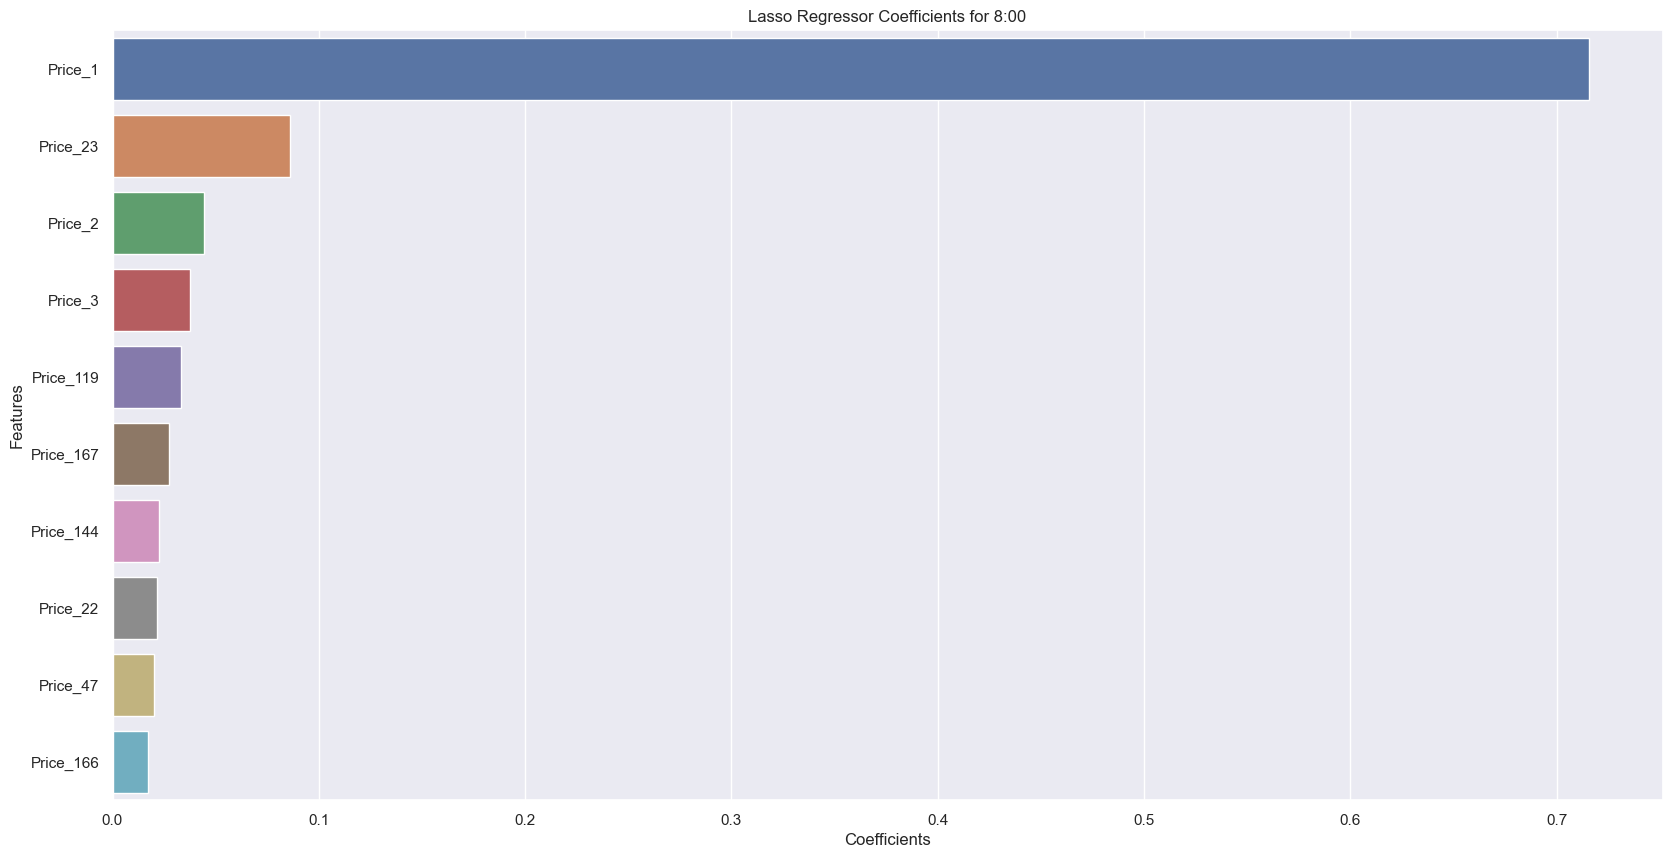

In [295]:
# Barplot for top 10 coeffiecients (features) for hour 8:00

sns.barplot(x=a['Coefficients'],y=a.index )
plt.title('Lasso Regressor Coefficients for 8:00')
plt.ylabel('Features')
plt.xlabel('Coefficients')

In [296]:
# Create multi data frame that will provides us with the residuals and squared residuals for every trained model, 
# for every hour


lasso_train = {hour: pd.DataFrame() for hour in hours}
lasso_test = {hour: pd.DataFrame() for hour in hours}

for hour in hours:
    lasso_train[hour] = pd.DataFrame(columns=['Actual Value', 'Predicted Value', 'Residual', 'Squared Residuals'])
    lasso_train[hour]['Actual Value'] = y_train[hour]
    lasso_train[hour]['Predicted Value'] = model_train[hour].predict(X_train[hour])
    lasso_train[hour]['Residual'] = lasso_train[hour]['Actual Value'] - lasso_train[hour]['Predicted Value']
    lasso_train[hour]['Squared Residuals'] = lasso_train[hour]['Residual'].mul(lasso_train[hour]['Residual'])

for hour in hours:
    lasso_test[hour] = pd.DataFrame(columns=['Actual Value', 'Predicted Value', 'Residual', 'Squared Residuals'])
    lasso_test[hour]['Actual Value'] = y_test[hour]
    lasso_test[hour]['Predicted Value'] = model_train[hour].predict(X_test[hour])
    lasso_test[hour]['Residual'] = lasso_test[hour]['Actual Value'] - lasso_test[hour]['Predicted Value']
    lasso_test[hour]['Squared Residuals'] = lasso_test[hour]['Residual'].mul(lasso_test[hour]['Residual'])


# Example of the table
lasso_train[18]

,Actual Value,Predicted Value,Residual,Squared Residuals
DateTime,,,,
2016-01-01 18:00:00,39.55,39.064274,0.485726,0.235930
2016-01-02 18:00:00,55.08,46.873960,8.206040,67.339099
2016-01-03 18:00:00,50.86,43.793998,7.066002,49.928387
2016-01-04 18:00:00,42.81,48.721936,-5.911936,34.950991
2016-01-05 18:00:00,49.04,55.039134,-5.999134,35.989612
...,...,...,...,...
2020-01-01 18:00:00,43.00,45.430458,-2.430458,5.907127
2020-01-02 18:00:00,40.00,35.919988,4.080012,16.646501
2020-01-03 18:00:00,39.99,34.853571,5.136429,26.382906


## Garch Model

## Working an example

In [297]:
from arch import arch_model

# Using arch_lasso_exp as an example, variable b takes an int number pointing the hour 
# we want to produce the arch model

b = 22

arch_lasso_exp = arch_model(lasso_train[b]['Residual'], vol='GARCH', p=1,q=1, dist='normal', mean='zero')
arch_lasso_exp = arch_lasso_exp.fit()
arch_lasso_exp.summary()
arch_lasso_exp.forecast(horizon=len(lasso_test[b])).variance.values[-1, :]

Iteration:      1,   Func. Count:      5,   Neg. LLF: 8543.280815392249
Iteration:      2,   Func. Count:     13,   Neg. LLF: 206060.25791060418
Iteration:      3,   Func. Count:     18,   Neg. LLF: 3916.125099531926
Iteration:      4,   Func. Count:     23,   Neg. LLF: 3904.6681446625457
Iteration:      5,   Func. Count:     28,   Neg. LLF: 4875.0696759583025
Iteration:      6,   Func. Count:     33,   Neg. LLF: 3910.598408440727
Iteration:      7,   Func. Count:     38,   Neg. LLF: 3901.7881617431854
Iteration:      8,   Func. Count:     43,   Neg. LLF: 3901.6608455035994
Iteration:      9,   Func. Count:     47,   Neg. LLF: 3901.659795265862
Iteration:     10,   Func. Count:     51,   Neg. LLF: 3901.6597824590663
Iteration:     11,   Func. Count:     54,   Neg. LLF: 3901.659782458591
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3901.6597824590663
            Iterations: 11
            Function evaluations: 54
            Gradient evaluati

array([14.86136968, 14.91523551, 14.96852377, 15.02124065, 15.07339229,
       15.12498473, 15.17602399, 15.22651598, 15.27646657, 15.32588158,
       15.37476674, 15.42312774, 15.4709702 , 15.51829967, 15.56512165,
       15.61144159, 15.65726488, 15.70259683, 15.74744271, 15.79180774,
       15.83569708, 15.87911581, 15.92206899, 15.96456162, 16.00659862,
       16.04818488, 16.08932525, 16.13002449, 16.17028734, 16.21011847,
       16.24952252, 16.28850407, 16.32706764, 16.36521772, 16.40295875,
       16.44029509, 16.47723111, 16.51377108, 16.54991926, 16.58567984,
       16.62105699, 16.6560548 , 16.69067736, 16.72492869, 16.75881276,
       16.79233351, 16.82549484, 16.8583006 , 16.8907546 , 16.92286063,
       16.9546224 , 16.98604361, 17.0171279 , 17.04787891, 17.07830018,
       17.10839527, 17.13816767, 17.16762084, 17.19675821, 17.22558315,
       17.25409901, 17.28230912, 17.31021676, 17.33782515, 17.36513752,
       17.39215704, 17.41888684, 17.44533003, 17.4714897 , 17.49

Text(0.5, 1.0, 'Volatility for 22:00')

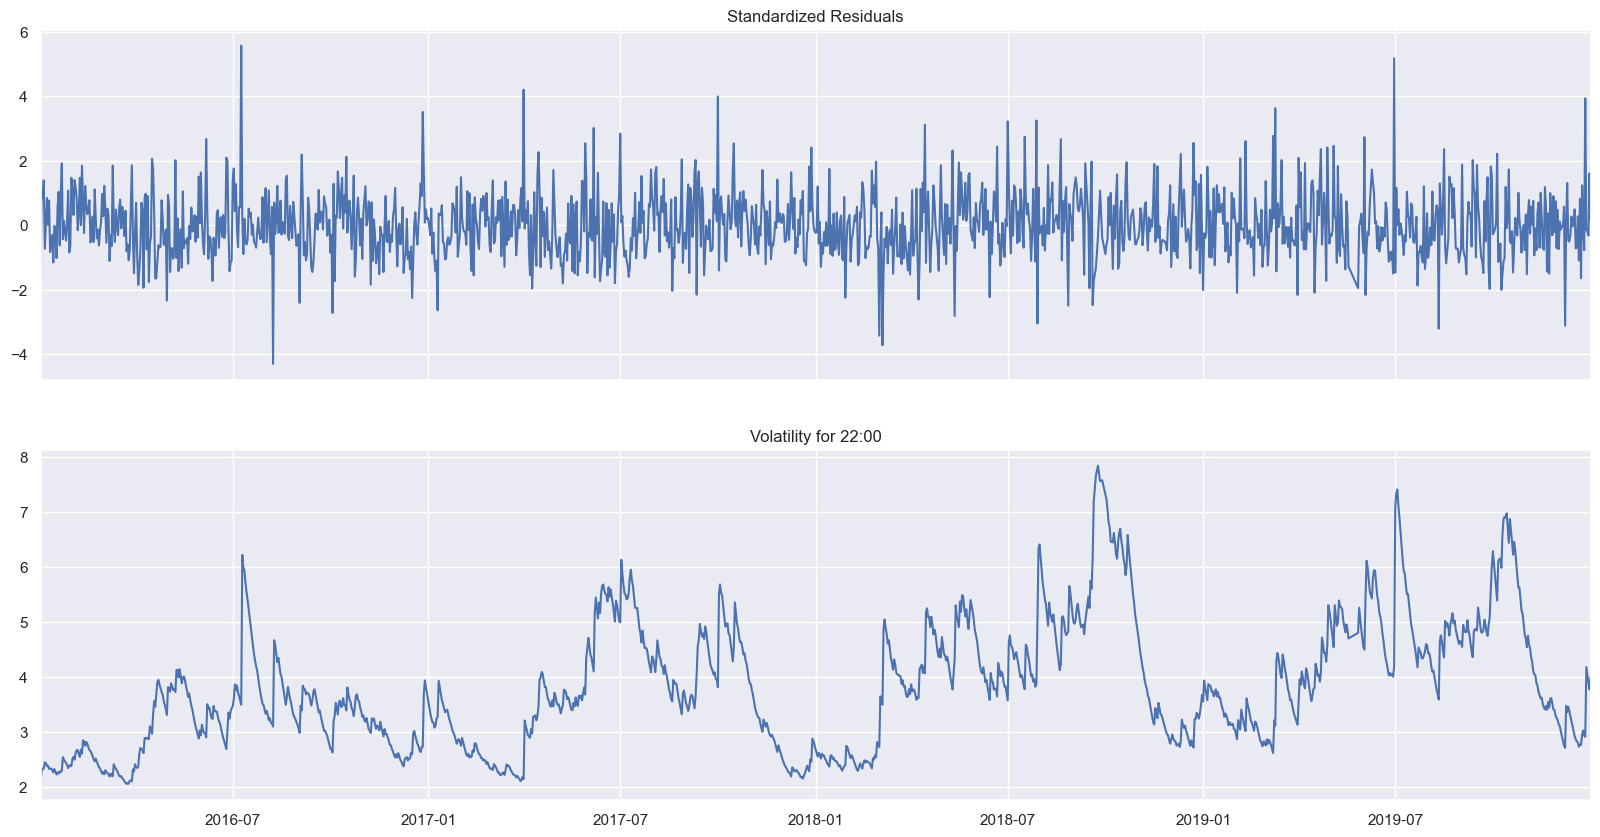

In [298]:
# Producing conditional volatility plot for our garch model

arch_lasso_exp.plot();
plt.title('Volatility for ' + str(b) + ':00')


Text(0.5, 1.0, 'Distribution of Standardized Residuals for GARCH(1,1) - 22:00')

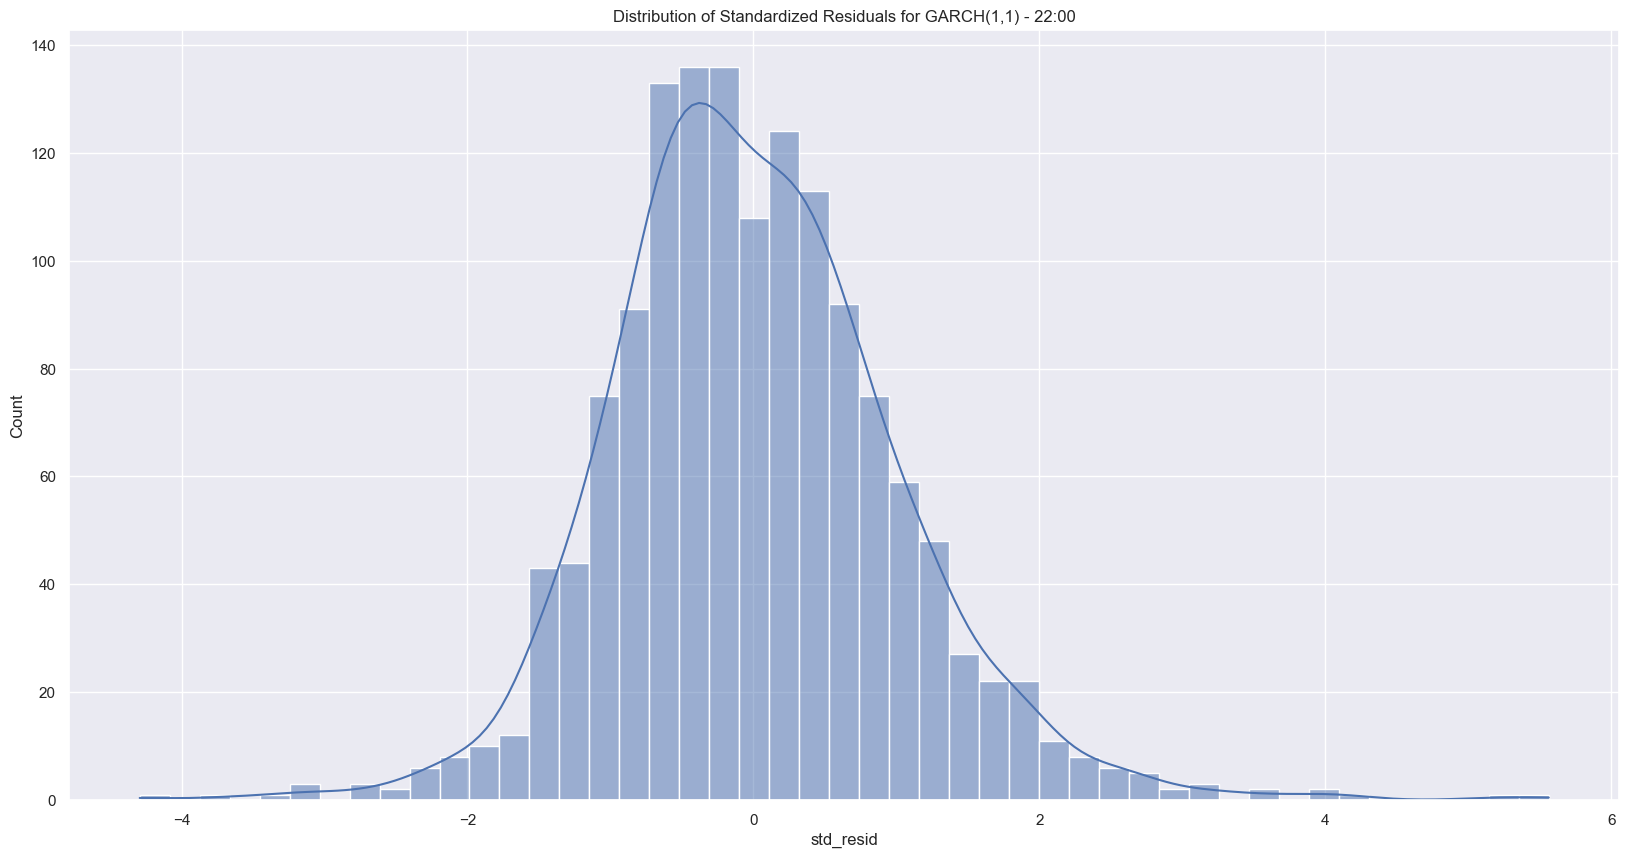

In [299]:
# Plotting the standardized residuals of our garch model

sns.histplot(arch_lasso_exp.std_resid, kde=True)
plt.title('Distribution of Standardized Residuals for GARCH(1,1) - ' + str(b) + ':00')

Text(0.5, 1.0, 'QQplot for Standardized Residuals - GARCH(1,1) 22:00')

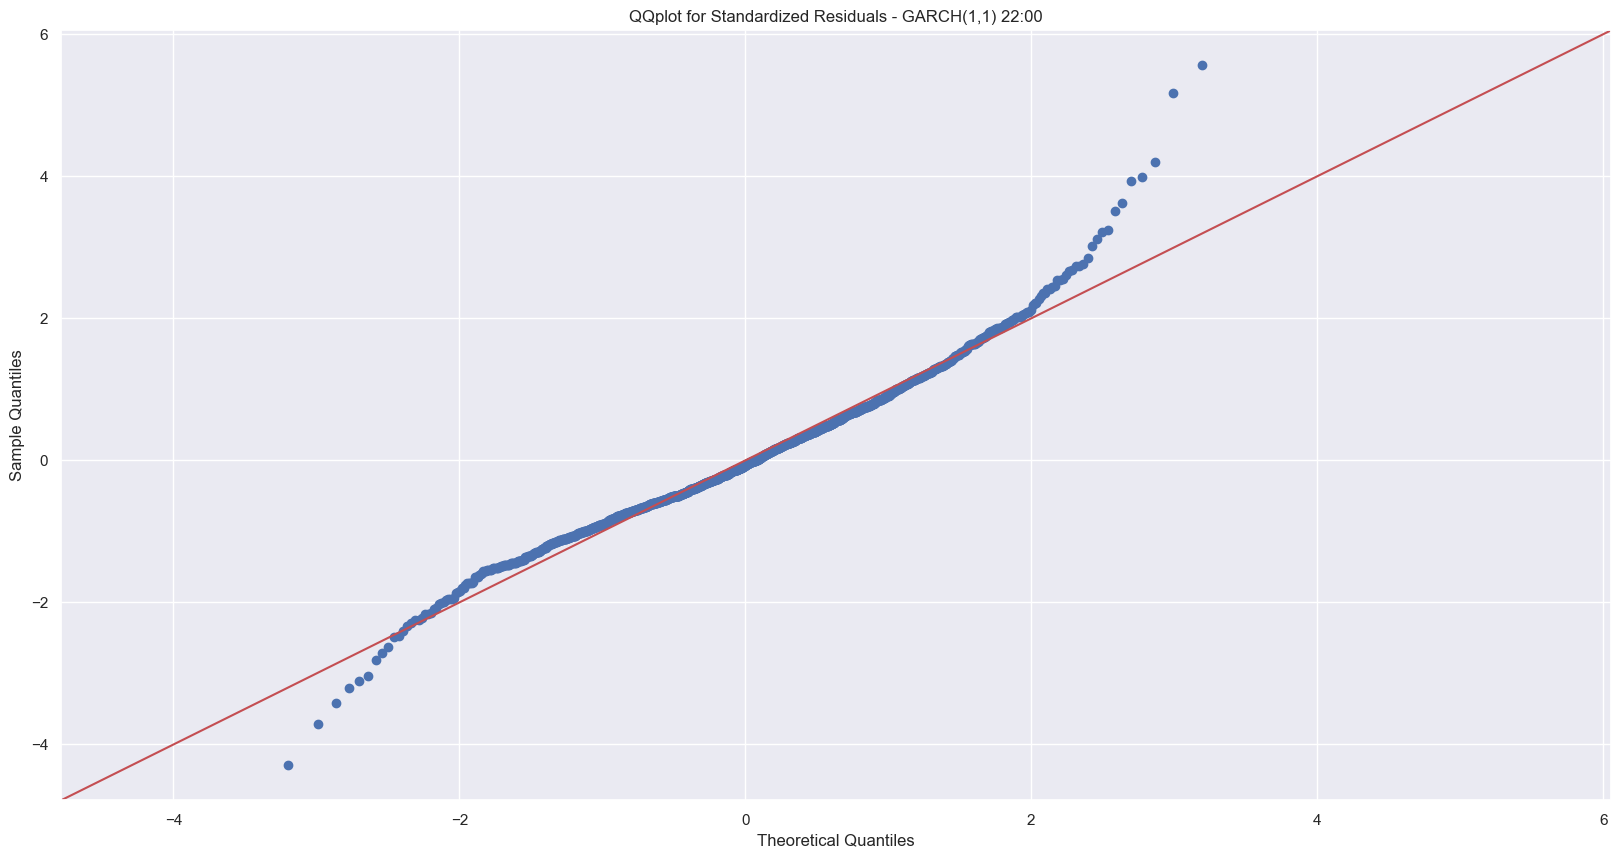

In [300]:
# Plotting the qqplot of our standardized residuals

import statsmodels.api as sm
import pylab

x = arch_lasso_exp.std_resid
sm.qqplot(x, line='45')

plt.title('QQplot for Standardized Residuals - GARCH(1,1) ' + str(b) + ':00')

## Training every model

In [301]:
# Training every garch model for every hour ( takes the residuals from our trained lasso models)

from scipy import stats
garch_lasso_train = {hour: pd.DataFrame() for hour in hours}

for hour in hours:
    garch_lasso_train[hour] = arch_model(lasso_train[hour]['Residual'], vol='GARCH', p=1,q=1, mean='zero').fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7466.621315463066
Iteration:      2,   Func. Count:     11,   Neg. LLF: 3519.799750155934
Iteration:      3,   Func. Count:     16,   Neg. LLF: 3488.0461965954164
Iteration:      4,   Func. Count:     21,   Neg. LLF: 3485.8068824516804
Iteration:      5,   Func. Count:     25,   Neg. LLF: 3485.780019591982
Iteration:      6,   Func. Count:     29,   Neg. LLF: 3485.779724415813
Iteration:      7,   Func. Count:     33,   Neg. LLF: 3485.7797216296003
Iteration:      8,   Func. Count:     36,   Neg. LLF: 3485.779721629592
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3485.7797216296003
            Iterations: 8
            Function evaluations: 36
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      5,   Neg. LLF: 7459.0437790834985
Iteration:      2,   Func. Count:     11,   Neg. LLF: 3532.45633670966
Iteration:      3,   Func. Count:     17,   Neg. LLF: 3429.4546331101

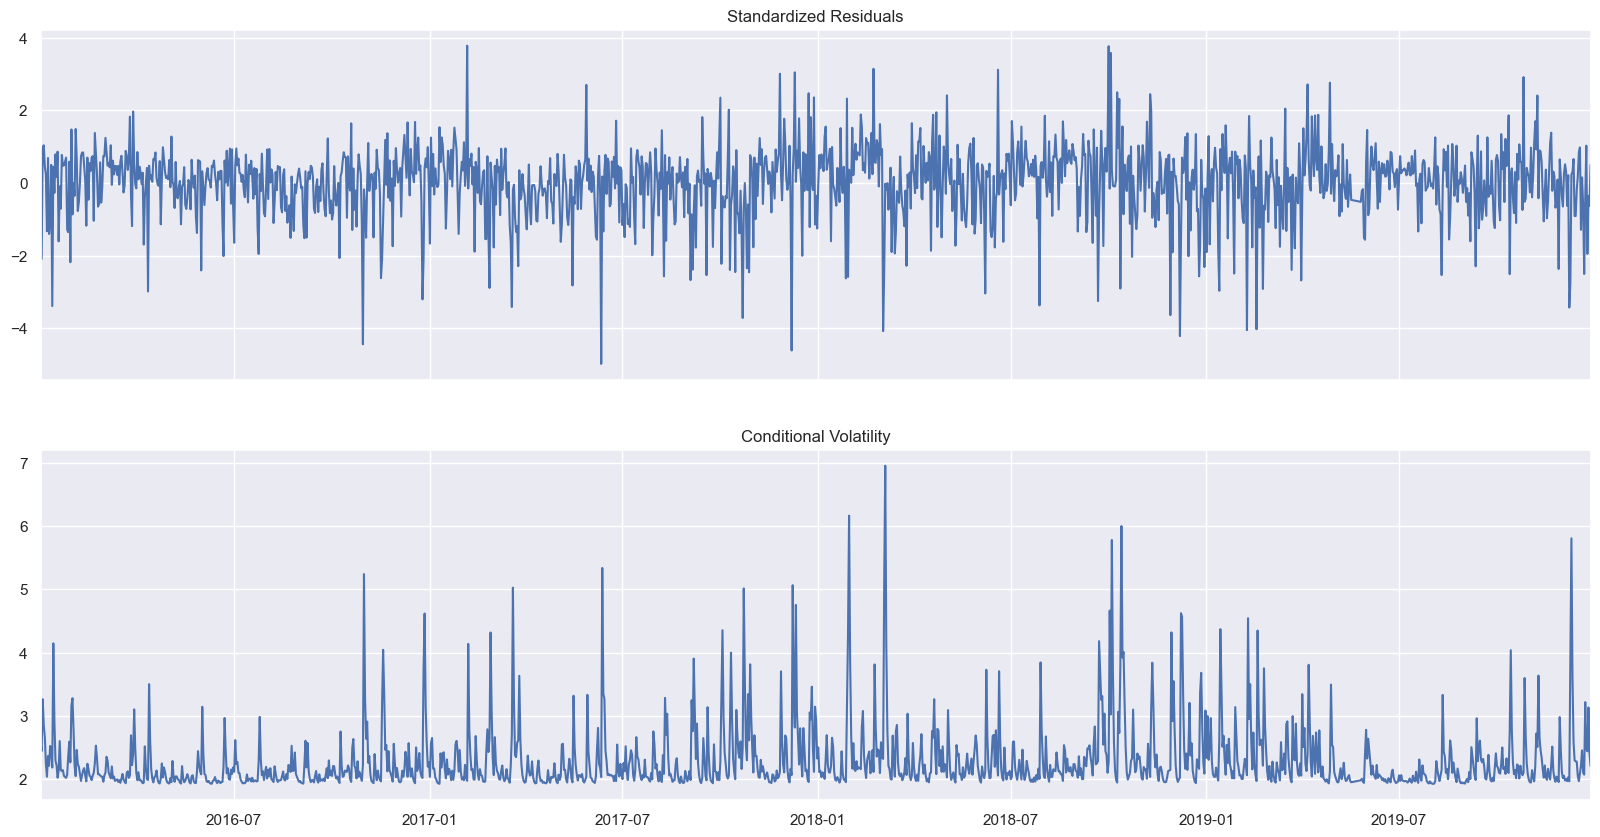

In [302]:
fig = garch_lasso_train[2].plot()

In [303]:
garch_lasso_results = {hour: pd.DataFrame() for hour in hours}

for hour in hours:
    garch_lasso_results[hour]['Actual Value'] = lasso_test[hour]['Actual Value']
    garch_lasso_results[hour]['Predicted Value'] = lasso_test[hour]['Predicted Value']
    garch_lasso_results[hour]['Residual'] = lasso_test[hour]['Residual']
    garch_lasso_results[hour]['Squared Residuals'] = lasso_test[hour]['Squared Residuals']
    garch_lasso_results[hour]['STD'] = np.sqrt(garch_lasso_train[hour].forecast(horizon=len(lasso_test[hour])).variance.values[-1, :])
    

In [304]:
garch_lasso_results[1]

,Actual Value,Predicted Value,Residual,Squared Residuals,STD
DateTime,,,,,
2019-12-26 01:00:00,36.00,42.825574,-6.825574,46.588461,3.716242
2019-12-27 01:00:00,28.73,35.206988,-6.476988,41.951376,3.268010
2019-12-28 01:00:00,24.97,27.746052,-2.776052,7.706467,3.013595
2019-12-29 01:00:00,23.55,24.893451,-1.343451,1.804860,2.875051
2019-12-30 01:00:00,22.96,23.959366,-0.999366,0.998732,2.801685
...,...,...,...,...,...
2020-12-27 01:00:00,2.13,9.615662,-7.485662,56.035135,2.723070
2020-12-28 01:00:00,62.00,47.531404,14.468596,209.340265,2.723070
2020-12-29 01:00:00,63.98,60.408715,3.571285,12.754076,2.723070


# Lasso with mean standard deviation

In [305]:
lasso_mean_results = {hour: pd.DataFrame() for hour in hours}
for hour in hours:
    lasso_mean_results[hour]['Actual Value'] = lasso_test[hour]['Actual Value']
    lasso_mean_results[hour]['Predicted Value'] = lasso_test[hour]['Predicted Value']
    lasso_mean_results[hour]['Residual'] = lasso_test[hour]['Residual']
    lasso_mean_results[hour]['Squared Residuals'] = lasso_test[hour]['Squared Residuals']
    lasso_mean_results[hour]['STD'] = np.sqrt(1+(1/len(lasso_mean_results[hour])))*np.sqrt((1/(len(lasso_mean_results[hour]-1)))*np.sum(lasso_mean_results[hour]['Residual'].mul(lasso_mean_results[hour]['Residual'])))*np.sqrt(1+(1/(len(lasso_mean_results[hour]))))

In [306]:
lasso_mean_results[4]

,Actual Value,Predicted Value,Residual,Squared Residuals,STD
DateTime,,,,,
2019-12-28 04:00:00,19.04,20.596000,-1.556000,2.421135,3.230106
2019-12-29 04:00:00,17.79,17.953809,-0.163809,0.026833,3.230106
2019-12-30 04:00:00,19.92,18.596604,1.323396,1.751376,3.230106
2019-12-31 04:00:00,28.93,27.343371,1.586629,2.517392,3.230106
2020-01-01 04:00:00,26.37,23.394896,2.975104,8.851241,3.230106
...,...,...,...,...,...
2020-12-26 04:00:00,15.27,17.623298,-2.353298,5.538014,3.230106
2020-12-28 04:00:00,36.10,43.407812,-7.307812,53.404120,3.230106
2020-12-29 04:00:00,48.00,47.416833,0.583167,0.340083,3.230106


# Lasso - ARIMA Model

In [307]:
import statsmodels.api as sm
import pmdarima as pm

## Trainning ARIMA and Parameter Estimation

In [308]:
arima_train = {hour: pd.DataFrame() for hour in hours}
arima_order = {hour: pd.DataFrame() for hour in hours}

arima_hour = []
arima_pqd = []

for hour in hours:
    arima_train[hour] = pm.auto_arima(lasso_train[hour]['Residual'],
                                      test='adf',
                                      suppress_warnings=True,
                                      stepwise=True,
                                      seasonal=True,
                                      trace=False,
                                      information_criterion='aic')
    arima_hour.append('Arima on hour: '+ str(hour))
    arima_pqd.append(arima_train[hour].order)

for hour in hours:
    arima_order[hour]['Name'] = arima_hour
    arima_order[hour]['Order'] = arima_pqd

arima_order

{0:                  Name      Order
 0    Arima on hour: 0  (1, 0, 1)
 1    Arima on hour: 1  (1, 0, 3)
 2    Arima on hour: 2  (1, 0, 1)
 3    Arima on hour: 3  (1, 0, 1)
 4    Arima on hour: 4  (2, 0, 1)
 5    Arima on hour: 5  (1, 0, 0)
 6    Arima on hour: 6  (2, 0, 2)
 7    Arima on hour: 7  (1, 0, 2)
 8    Arima on hour: 8  (5, 0, 2)
 9    Arima on hour: 9  (1, 0, 1)
 10  Arima on hour: 10  (1, 0, 0)
 11  Arima on hour: 11  (2, 0, 2)
 12  Arima on hour: 12  (3, 0, 3)
 13  Arima on hour: 13  (0, 0, 0)
 14  Arima on hour: 14  (0, 0, 0)
 15  Arima on hour: 15  (2, 0, 3)
 16  Arima on hour: 16  (1, 0, 1)
 17  Arima on hour: 17  (5, 0, 5)
 18  Arima on hour: 18  (2, 0, 2)
 19  Arima on hour: 19  (1, 0, 1)
 20  Arima on hour: 20  (1, 0, 1)
 21  Arima on hour: 21  (1, 0, 1)
 22  Arima on hour: 22  (1, 0, 1)
 23  Arima on hour: 23  (1, 0, 1),
 1:                  Name      Order
 0    Arima on hour: 0  (1, 0, 1)
 1    Arima on hour: 1  (1, 0, 3)
 2    Arima on hour: 2  (1, 0, 1)
 3    A

In [309]:
lasso_arima_results = {hour: pd.DataFrame() for hour in hours}
arima_forecast = {hour: pd.DataFrame() for hour in hours}

for hour in hours:
    arima_forecast[hour] = arima_train[hour].predict(n_periods=len(lasso_test[hour]))

for hour in hours:
    lasso_arima_results[hour]['Actual Value'] = lasso_test[hour]['Actual Value']
    lasso_arima_results[hour]['Predicted Mean Value'] = lasso_test[hour]['Predicted Value']
    lasso_arima_results[hour]['Predicted Residual'] = arima_forecast[hour]
    lasso_arima_results[hour]['Predicted Value'] = lasso_arima_results[hour]['Predicted Mean Value'] + lasso_arima_results[hour]['Predicted Residual']
    lasso_arima_results[hour]['Error'] = lasso_arima_results[hour]['Actual Value'] - lasso_arima_results[hour]['Predicted Value']
    lasso_arima_results[hour]['STD'] = np.sqrt(1+(1/len(lasso_arima_results[hour])))*np.sqrt((1/(len(lasso_arima_results[hour])-1))*np.sum(lasso_arima_results[hour]['Error'].mul(lasso_arima_results[hour]['Error'])))


In [310]:
lasso_arima_results[7]

,Actual Value,Predicted Mean Value,Predicted Residual,Predicted Value,Error,STD
DateTime,,,,,,
2020-01-02 07:00:00,36.90,31.315910,-1.286351e-01,31.187275,5.712725,4.644412
2020-01-03 07:00:00,35.43,33.831454,1.610508e-03,33.833064,1.596936,4.644412
2020-01-04 07:00:00,26.51,24.493629,1.554855e-03,24.495184,2.014816,4.644412
2020-01-05 07:00:00,28.09,25.637117,1.501126e-03,25.638618,2.451382,4.644412
2020-01-06 07:00:00,37.20,32.982188,1.449254e-03,32.983637,4.216363,4.644412
...,...,...,...,...,...,...
2020-12-27 07:00:00,8.22,8.448450,6.097204e-09,8.448450,-0.228450,4.644412
2020-12-28 07:00:00,45.23,54.240219,5.886511e-09,54.240219,-9.010219,4.644412
2020-12-29 07:00:00,50.16,54.102065,5.683098e-09,54.102065,-3.942065,4.644412


# Evaluation Metrics

## Reliability Diagrams

In [311]:
from ProbEval import reliability_diagram

In [312]:
h = 5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


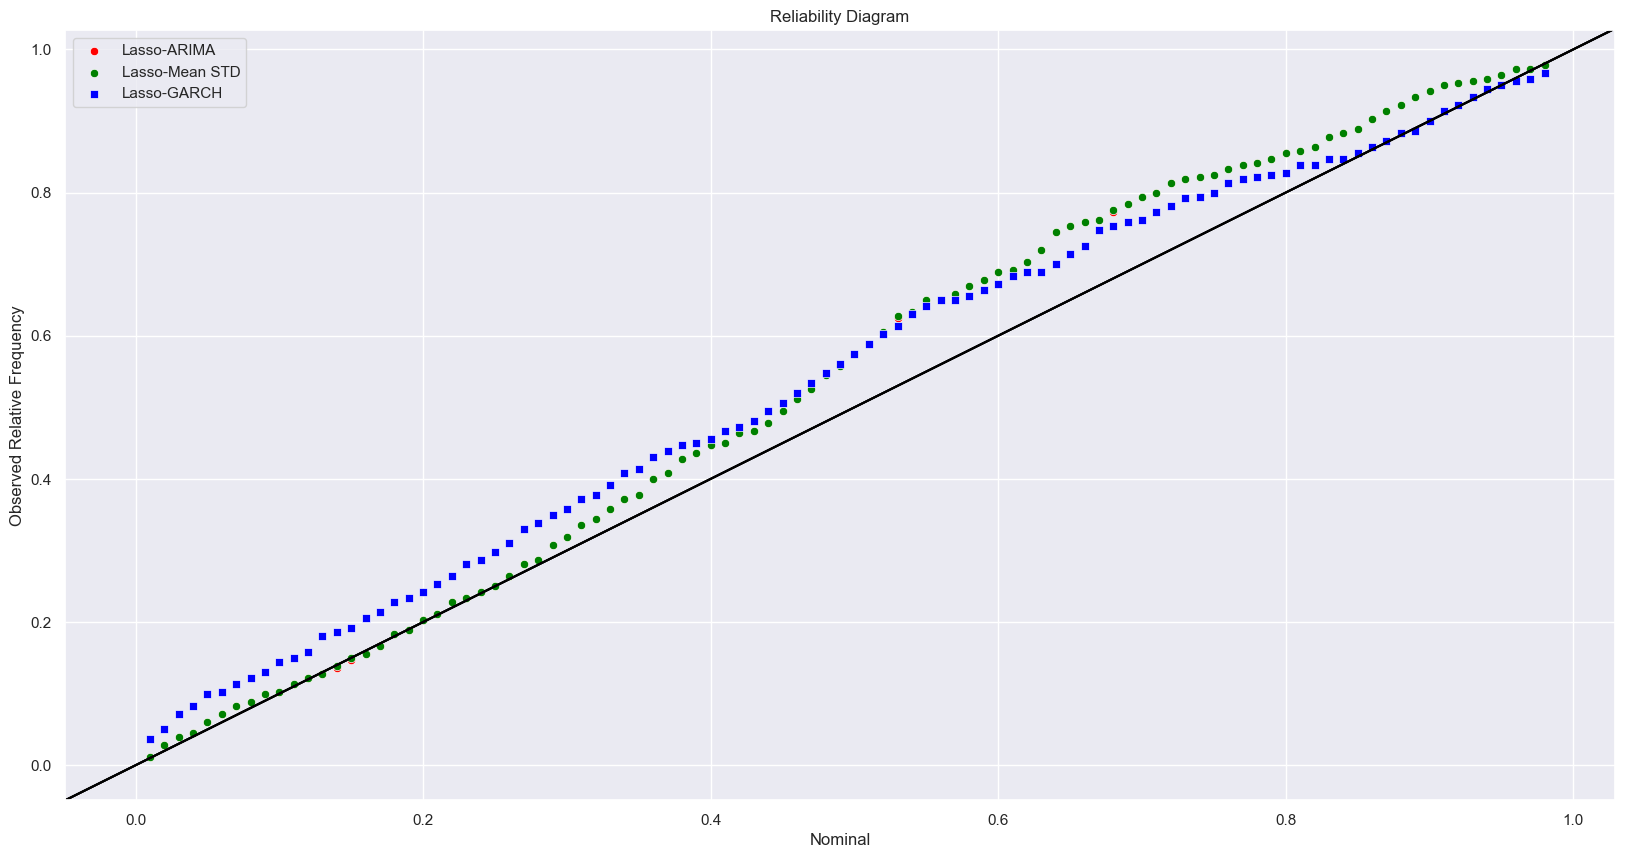

In [313]:
%load_ext autoreload

%autoreload 2

reliability_diagram(lasso_arima_results[h],
                    obs='Actual Value',
                    mu='Predicted Value',
                    std='STD',
                    plot=True,
                    c='red',
                    l='Lasso-ARIMA',
                    m='o')
reliability_diagram(lasso_mean_results[h],
                    obs='Actual Value',
                    mu='Predicted Value',
                    std='STD',
                    plot=True,
                    c='green',
                    l='Lasso-Mean STD',
                    m='o')
reliability_diagram(garch_lasso_results[h],
                    obs='Actual Value',
                    mu='Predicted Value',
                    std='STD',
                    plot=True,
                    c='blue',
                    l='Lasso-GARCH',
                    m='s')

## CRPS

In [314]:
from ProbEval import crps_norm

In [315]:
crps_score_table = pd.DataFrame(columns=('Model', 'LASSO-GARCH CRPS', 'LASSO Benchmark CRPS', 'LASSO-ARIMA CRPS'))
lasso_garch_crps = {hour: pd.DataFrame() for hour in hours}
lasso_mean_crps = {hour: pd.DataFrame() for hour in hours}
lasso_arima_crps = {hour: pd.DataFrame() for hour in hours}

l_g_crps = []
l_m_crps = []
l_a_crps = []
h = []


for hour in hours:
    lasso_garch_crps[hour] = crps_norm(garch_lasso_results[hour],
                                 obs='Actual Value',
                                 m='Predicted Value',
                                 sigma='STD')
    l_g_crps.append(np.mean(lasso_garch_crps[hour]))

    lasso_mean_crps[hour] = crps_norm(lasso_mean_results[hour],
                                      obs='Actual Value',
                                      m='Predicted Value',
                                      sigma='STD')
    l_m_crps.append(np.mean(lasso_mean_crps[hour]))

    lasso_arima_crps[hour] = crps_norm(lasso_arima_results[hour],
                                       obs='Actual Value',
                                       m='Predicted Value',
                                       sigma='STD')
    l_a_crps.append(np.mean(lasso_arima_crps[hour]))

    h.append('Model at time: '+ str(hour))


crps_score_table['Model'] = h
crps_score_table['LASSO-GARCH CRPS'] = l_g_crps
crps_score_table['LASSO Benchmark CRPS'] = l_m_crps
crps_score_table['LASSO-ARIMA CRPS'] = l_a_crps 



In [316]:
crps_score_table

,Model,LASSO-GARCH CRPS,LASSO Benchmark CRPS,LASSO-ARIMA CRPS
0,Model at time: 0,1.536371,1.542481,1.541972
1,Model at time: 1,1.533045,1.541029,1.536922
2,Model at time: 2,1.308455,1.314715,1.315559
3,Model at time: 3,1.165699,1.165406,1.165537
4,Model at time: 4,1.789642,1.779261,1.796489
5,Model at time: 5,2.075325,2.077652,2.077055
6,Model at time: 6,2.591776,2.605524,2.603464
7,Model at time: 7,2.598546,2.571996,2.572222
8,Model at time: 8,1.953130,1.954959,1.954336
9,Model at time: 9,1.676545,1.666183,1.662878


## Pinball Loss

In [317]:
from ProbEval import pinball_loss_norm

In [353]:
h = 17

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


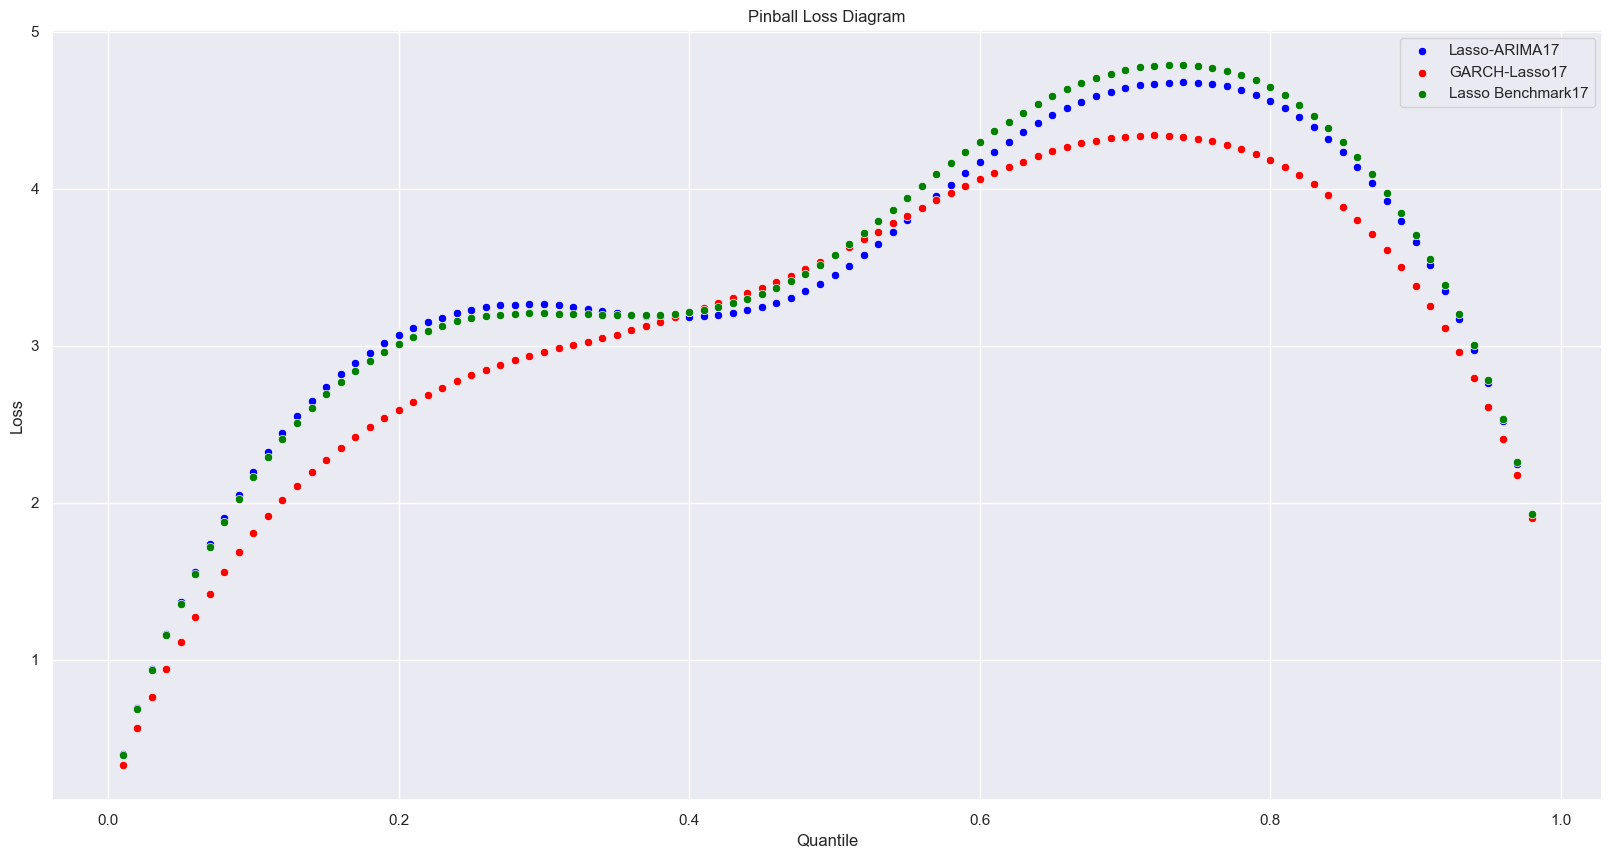

In [354]:
%load_ext autoreload

%autoreload 2


pinball_loss_norm(lasso_arima_results[h],
                  obs='Actual Value',
                  mu='Predicted Value',
                  std='STD',
                  l='Lasso-ARIMA' + str(h),
                  c='blue')
pinball_loss_norm(garch_lasso_results[h],
                  obs='Actual Value',
                  mu='Predicted Value',
                  std='STD',
                  l='GARCH-Lasso' + str(h),
                  c='red')
pinball_loss_norm(lasso_mean_results[h],
                  obs='Actual Value',
                  mu='Predicted Value',
                  std='STD',
                  l='Lasso Benchmark' + str(h),
                  c='green')